# I. INTRODUCTION


Boston Marathon is one of the famous marathons in the world . As a runner myself, i fell interesting about it . The dataset contains the name, age, gender, country, city and state (where available), official time , overall place, gender place and division place of 21652 finishers of 2012 Boston Marathon.

## import library needed

In [140]:
import numpy as np2
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


# II. TRANSFORMS DATA

## read data

In [154]:
marathon_data=pd.read_csv('results.csv')
print(marathon_data.shape)

(21652, 12)


In [3]:
marathon_data.head()

,division,name,city,gender,age,official,bib,overall,state,genderdiv,net,country
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,NaN,4 / 26,83.45,JPN
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,NaN,14 / 12621,142.93,ETH
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,NaN,6 / 26,84.38,RSA
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,NaN,2 / 26,81.65,AUS
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,NaN,3 / 26,83.43,JPN


## type of data

In [4]:
marathon_data.dtypes

division      object
name          object
city          object
gender        object
age            int64
official      object
bib           object
overall       object
state         object
genderdiv     object
net          float64
country       object
dtype: object

## find NaN and outliers

In [155]:
marathon_data.describe()

,age,net
count,21652.000000,21652.00000
mean,41.836135,258.64258
std,10.858308,49.94535
min,18.000000,78.42000
25%,33.000000,224.63000
50%,42.000000,251.07500
75%,50.000000,285.53000
max,83.000000,570.27000


* I think with problem with feature 'official' . And i see it equal to feature ' net' . So i decided remove it.
* I don't see problem with two features age and net.

In [5]:
display(marathon_data.isnull().any())

division     False
name         False
city         False
gender       False
age          False
official     False
bib          False
overall      False
state         True
genderdiv    False
net          False
country      False
dtype: bool

In [6]:
marathon_data.isnull().sum()/len(marathon_data)*100

division     0.000000
name         0.000000
city         0.000000
gender       0.000000
age          0.000000
official     0.000000
bib          0.000000
overall      0.000000
state        8.184001
genderdiv    0.000000
net          0.000000
country      0.000000
dtype: float64

* I see in this data . Feature 'state' not contain information so i romove it.

In [156]:
marathon_data=marathon_data.drop(columns=['state','official'])

In [157]:
marathon_data.head()

,division,name,city,gender,age,bib,overall,genderdiv,net,country
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,W1,4 / 35,4 / 26,83.45,JPN
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,2,14 / 21616,14 / 12621,142.93,ETH
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,W2,6 / 35,6 / 26,84.38,RSA
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,W3,2 / 35,2 / 26,81.65,AUS
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,W4,3 / 35,3 / 26,83.43,JPN


# III. VISUALIZATION

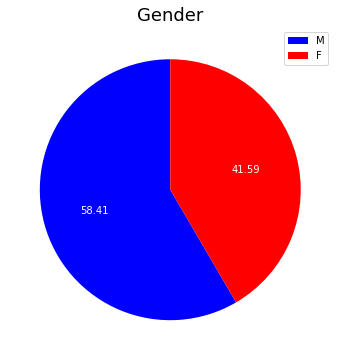

In [21]:
plt.figure(figsize=(6,6))
l = marathon_data.gender.value_counts().index
plt.pie(marathon_data.gender.value_counts(), colors =['b','r'], startangle = 90, autopct='%.2f', textprops=dict(color="w"))
#plt.axes().set_aspect('equal','datalim')
plt.legend(l, loc='upper right')
plt.title("Gender",fontsize=18)
plt.show()

* Consider about the overall section : Pacticipant is Male more than Female.

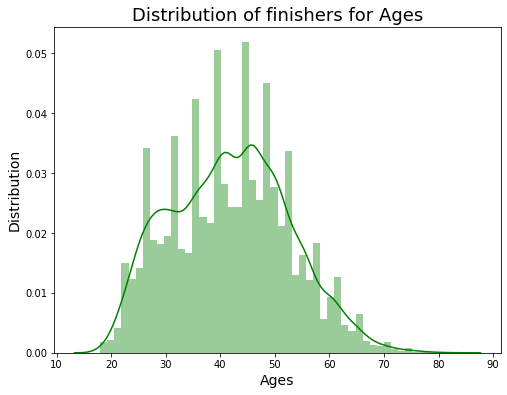

In [23]:
plt.figure(figsize=(8,6))
hage = sns.distplot(marathon_data.age, color='g')
hage.set_xlabel('Ages',fontdict= {'size':14})
hage.set_ylabel(u'Distribution',fontdict= {'size':14})
hage.set_title(u'Distribution of finishers for Ages',fontsize=18)
plt.show()


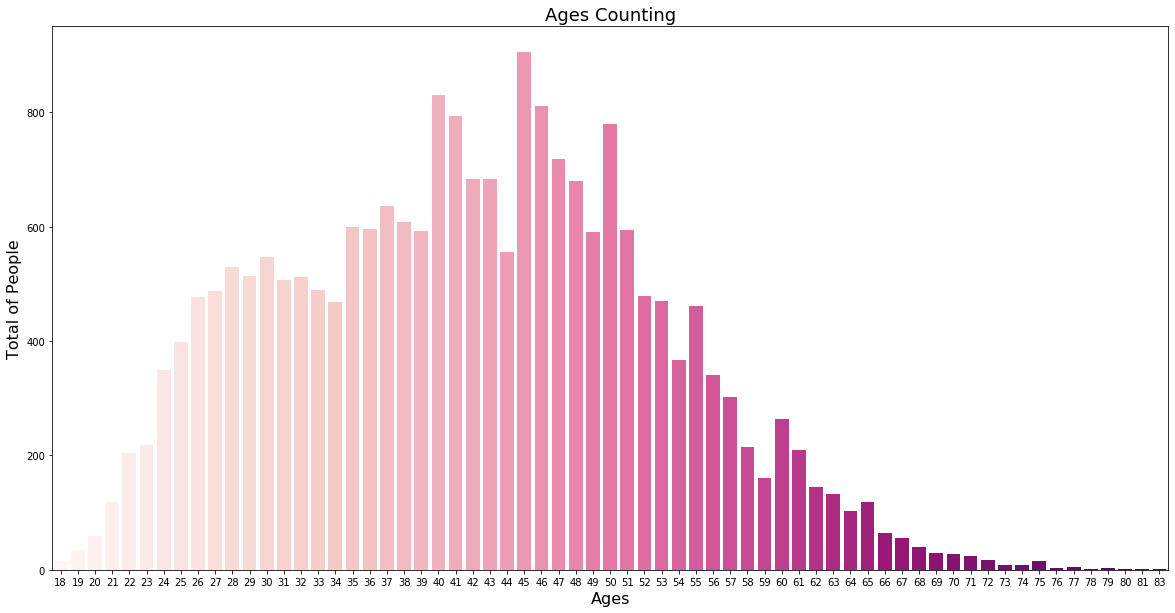

In [25]:
plt.figure(figsize=(20,10))
agecont = sns.countplot('age',data=marathon_data, palette=sns.color_palette("RdPu", n_colors=len(marathon_data.age.value_counts())))
agecont.set_title('Ages Counting', fontsize=18)
agecont.set_xlabel('Ages', fontdict= {'size':16})
agecont.set_ylabel('Total of People', fontdict= {'size':16})
plt.show()

After 2 figures we can see :
* Almost runner converge 35-50 ages.
* After 50 ages : total of runner decreased slowly.

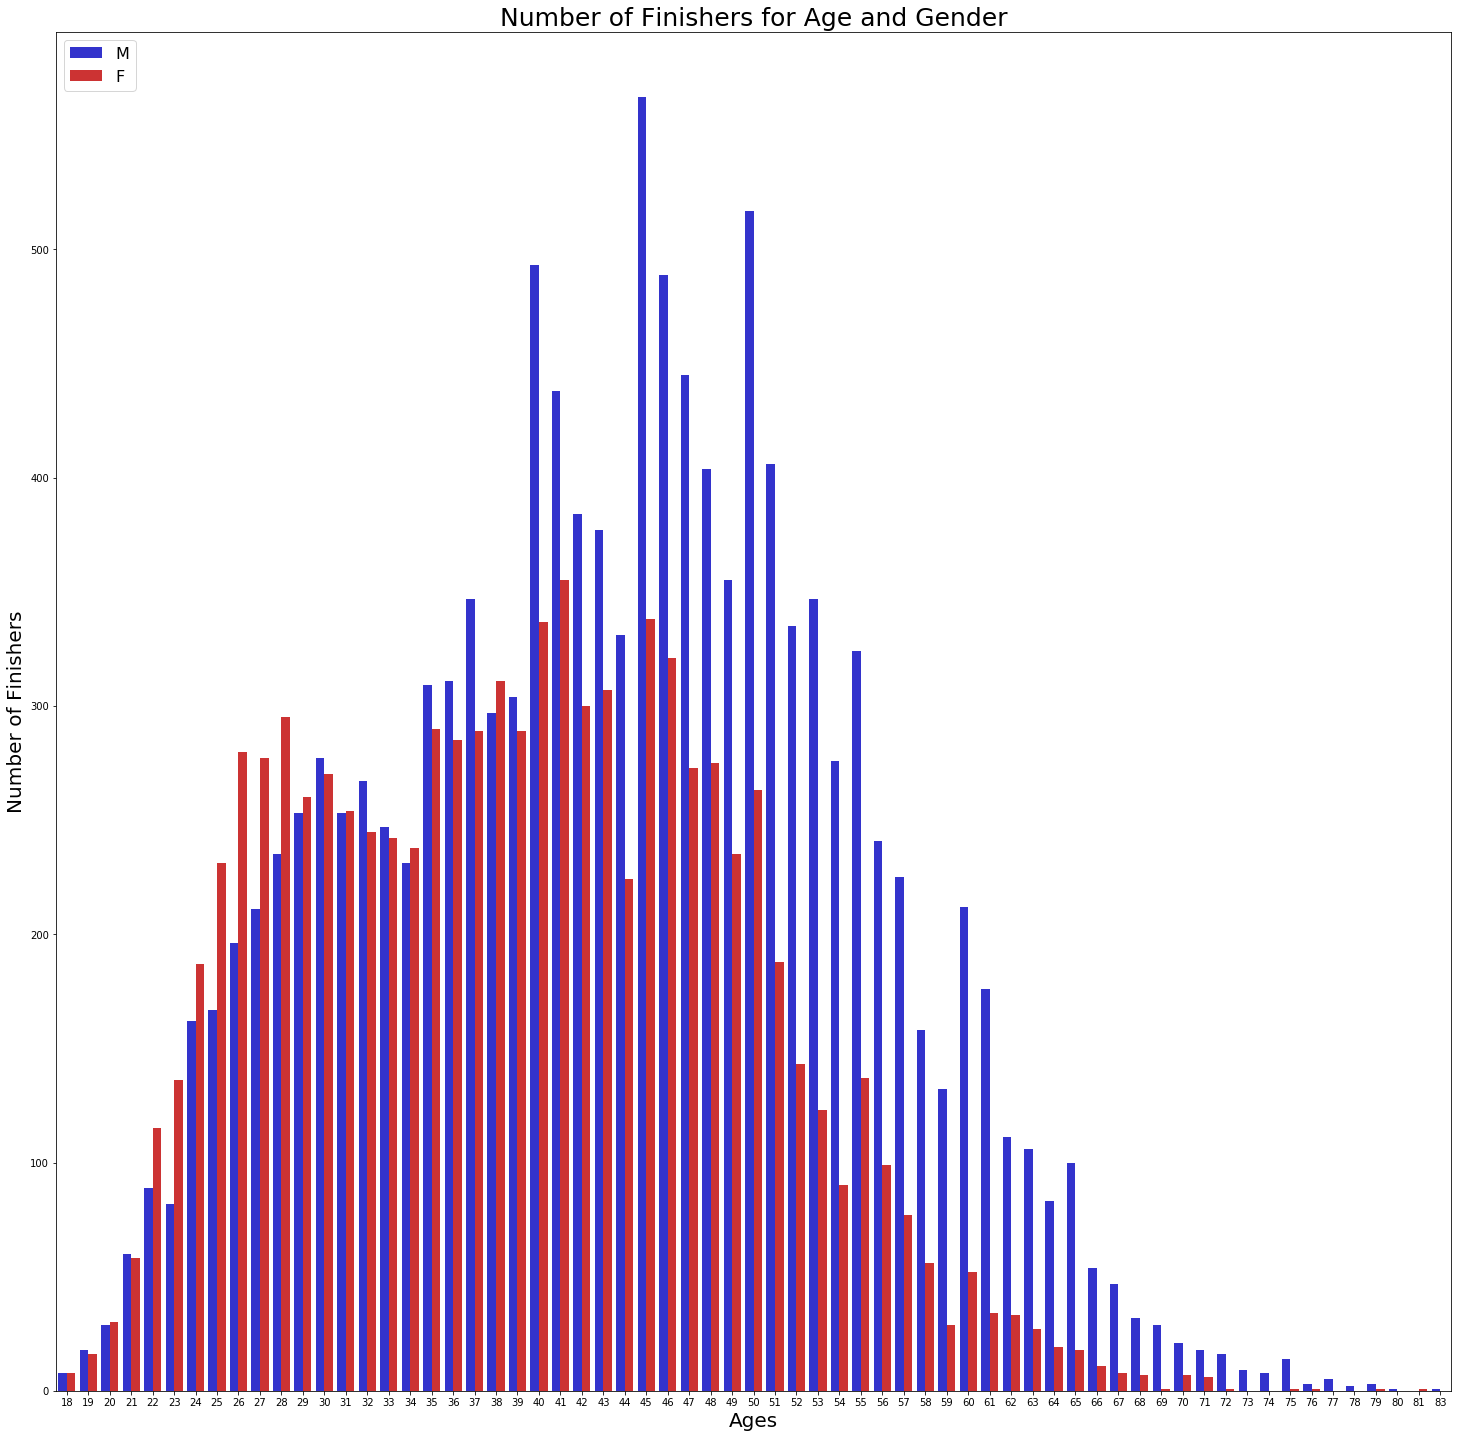

In [27]:
plt.figure(figsize=(25,25))
d = sns.countplot(x='age', hue='gender', data=marathon_data, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()

As above figure: We can see 
   * in 18-28 ages  : We can see the the runner are 'Male' < 'Female'.
   * in  29-40 ages : we can see the runner are 'Male' approximately 'Female'.
   * in >40  ages   : The runner are 'Male' > 'Female'.

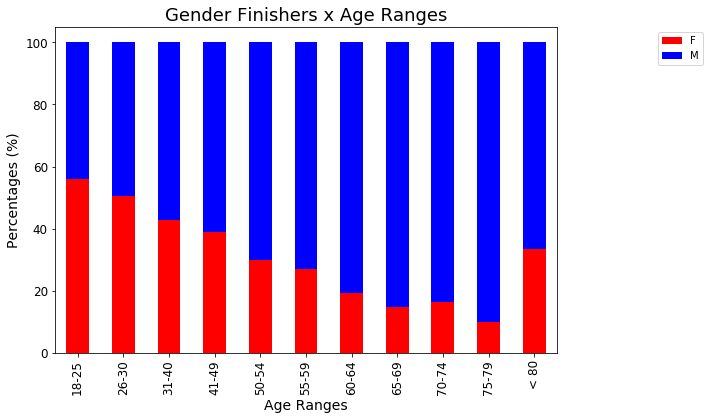

In [167]:
marathon_data1 = marathon_data.copy()
bins = [17,25, 39, 44, 49, 54, 59, 64, 69, 74, 79, 90]
marathon_data1['Ranges'] = pd.cut(marathon_data1['age'],bins,labels=["18-25", "26-30","31-40", "41-49", "50-54", "55-59", "60-64",
                                          "65-69", "70-74", "75-79", "< 80"]) 

marathon_data2 = pd.crosstab(marathon_data1.Ranges,marathon_data1.gender).apply(lambda r: (r/r.sum()) * 100 , axis=1)

ax1 = marathon_data2.plot(kind = "bar", stacked = True, color = ['r','b'], figsize=(9,6),
                      fontsize=12, position=0.5)
ax1.get_legend_handles_labels
ax1.legend(bbox_to_anchor = (1.3, 1))
ax1.set_xlabel('Age Ranges', fontdict={'size':14})
ax1.set_ylabel('Percentages (%)', fontdict={'size':14})
ax1.set_title('Gender Finishers x Age Ranges', fontsize=18)
plt.show()

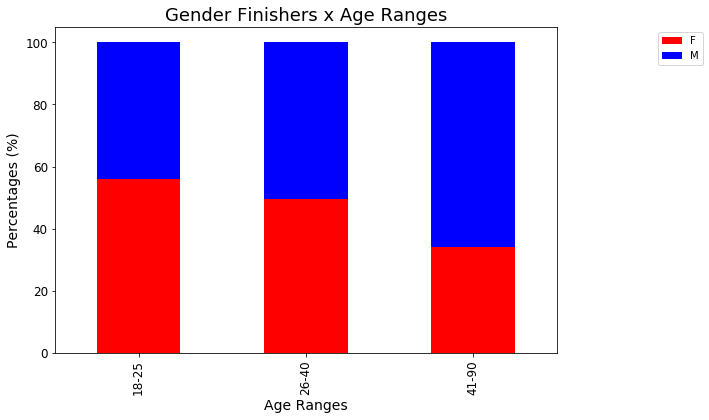

In [93]:
marathon_data1 = marathon_data.copy()
bins = [18, 25, 40, 90]
marathon_data1['Ranges'] = pd.cut(marathon_data1['age'],bins,labels=["18-25", "26-40", "41-90"]) 

marathon_data2 = pd.crosstab(marathon_data1.Ranges,marathon_data1.gender).apply(lambda r: (r/r.sum()) * 100 , axis=1)

ax1 = marathon_data2.plot(kind = "bar", stacked = True, color = ['r','b'], figsize=(9,6),
                      fontsize=12, position=0.5)
ax1.get_legend_handles_labels
ax1.legend(bbox_to_anchor = (1.3, 1))
ax1.set_xlabel('Age Ranges', fontdict={'size':14})
ax1.set_ylabel('Percentages (%)', fontdict={'size':14})
ax1.set_title('Gender Finishers x Age Ranges', fontsize=18)
plt.show()

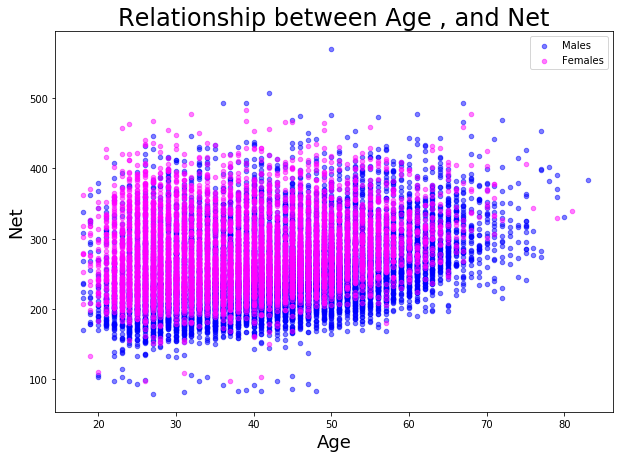

In [159]:
ax1=  marathon_data[ marathon_data['gender']=='M'].plot(kind='scatter', x='age',y='net', color='blue',alpha=0.5, figsize=(10,7))
marathon_data[ marathon_data['gender']=='F'].plot(kind='scatter', x='age',y='net', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Age , and Net', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Net', size=18);

## Find best k of K-mean clustering.

In [144]:
categorical_features = ['gender']

In [145]:
for col in categorical_features:
    dummies = pd.get_dummies(marathon_data[col], prefix=col)
    marathon_data = pd.concat([marathon_data, dummies], axis=1)
 #   marathon_data.drop(col, axis=1, inplace=True)
marathon_data.head()

,division,name,city,gender,age,official,bib,overall,genderdiv,net,country,gender_F,gender_M
0,4 / 26,"Soejima, Masazumi",Fukuoka City,M,41,83.45,W1,4 / 35,4 / 26,83.45,JPN,0,1
1,14 / 4335,"Gebremariam, Gebregziabher",Tigray,M,27,142.93,2,14 / 21616,14 / 12621,142.93,ETH,0,1
2,6 / 26,"Van Dyk, Ernst F.",Paarl,M,39,84.38,W2,6 / 35,6 / 26,84.38,RSA,0,1
3,2 / 26,"Fearnley, Kurt H.",Hamilton,M,31,81.65,W3,2 / 35,2 / 26,81.65,AUS,0,1
4,3 / 26,"Hokinoue, Kota",Iizuka,M,38,83.43,W4,3 / 35,3 / 26,83.43,JPN,0,1


In [135]:
data_predict=marathon_data[['gender_F','gender_M','age']]

In [136]:
mms = MinMaxScaler()
mms.fit(data_predict)
data_transformed = mms.transform(data_predict)

In [137]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

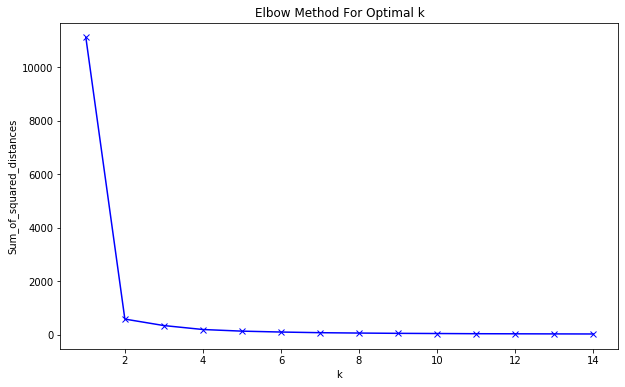

In [138]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

IF you can see . At the elbow . K=3 is best choice .

In [ ]:
ax1=  marathon_data[ marathon_data['gender_M']=='1'].plot(kind='scatter', x='age',y='official', color='blue',alpha=0.5, figsize=(10,7))
marathon_data[ marathon_data['gender']=='F'].plot(kind='scatter', x='age',y='official', color='magenta',alpha=0.5, figsize=(10,7),ax=ax1)
plt.legend(labels=['Males','Females'])
plt.title('Relationship between Age , and Official', size=24)
plt.xlabel('Age', size=18)
plt.ylabel('Official', size=18);